In [411]:
import pandas as pd #importing needed functions from different classes
import numpy as np
from sklearn import tree
import seaborn as sns
from pandas.api.types import is_string_dtype

In [412]:
df=pd.read_csv("Breast Cancer.csv") #upload file

In [413]:
df1=df.copy() #copying files
df2=df.copy()

In [414]:
df.head() # 1st five record

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [415]:
df.nunique() # getting unique values

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [416]:
df.info() # data frame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [417]:
df.describe() # in detail information

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [331]:
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder from sklear.preprocessing
le = LabelEncoder()

In [418]:
for col in df.columns:                           # doing loop for label encoding
    if is_string_dtype(df[col]) == True:
        df[col]=le.fit_transform(df[[col]])

C:\Users\imran\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [333]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [419]:
for col in df.columns:                     #again # doing loop for label encoding
    if is_string_dtype(df[col]) != True:
        df[col]=le.fit_transform(df[[col]])

In [420]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,41,1,370,1,455,452,444,531,521,526,...,41,497,516,358,516,520,483,485,506,0
1,42,1,426,186,486,513,120,215,321,396,...,199,465,511,158,210,278,401,222,375,0
2,488,1,406,324,478,487,403,459,478,516,...,261,455,491,287,464,438,468,445,361,0
3,489,1,98,297,164,95,471,533,507,493,...,298,281,194,408,524,511,479,499,533,0
4,490,1,418,60,493,506,332,414,480,492,...,28,453,470,239,245,415,363,81,216,0


<AxesSubplot:xlabel='Unnamed: 32', ylabel='count'>

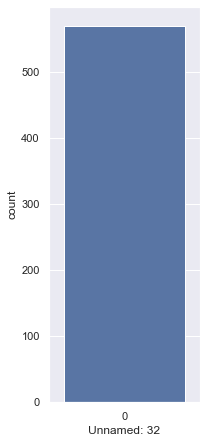

In [421]:
sns.set(rc={'figure.figsize':(2.7,7.27)}) # customizing the size of seaborn plot
sns.countplot(x='Unnamed: 32',data=df) 

In [422]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.0
mean,284.000000,0.372583,219.586995,236.855888,264.537786,268.790861,253.130053,271.586995,263.478032,264.727592,...,253.363796,263.010545,271.968366,205.957821,262.147627,264.219684,237.790861,247.949033,268.906854,0.0
std,164.400426,0.483918,125.770848,133.385694,151.005745,154.619229,136.250342,154.125189,158.267635,159.494408,...,144.907096,146.811822,156.612745,109.645933,151.004941,157.531181,144.145369,141.957663,153.812855,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,142.000000,0.000000,118.000000,125.000000,134.000000,136.000000,136.000000,138.000000,126.000000,127.000000,...,131.000000,138.000000,136.000000,116.000000,134.000000,130.000000,112.000000,126.000000,136.000000,0.0
50%,284.000000,0.000000,209.000000,235.000000,266.000000,268.000000,265.000000,277.000000,265.000000,263.000000,...,254.000000,271.000000,275.000000,204.000000,259.000000,265.000000,242.000000,251.000000,269.000000,0.0
75%,426.000000,1.000000,322.000000,347.000000,396.000000,401.000000,373.000000,403.000000,398.000000,402.000000,...,376.000000,387.000000,408.000000,295.000000,393.000000,401.000000,362.000000,369.000000,400.000000,0.0
max,568.000000,1.000000,455.000000,478.000000,521.000000,538.000000,473.000000,536.000000,536.000000,541.000000,...,510.000000,513.000000,543.000000,410.000000,528.000000,538.000000,491.000000,499.000000,534.000000,0.0


<AxesSubplot:>

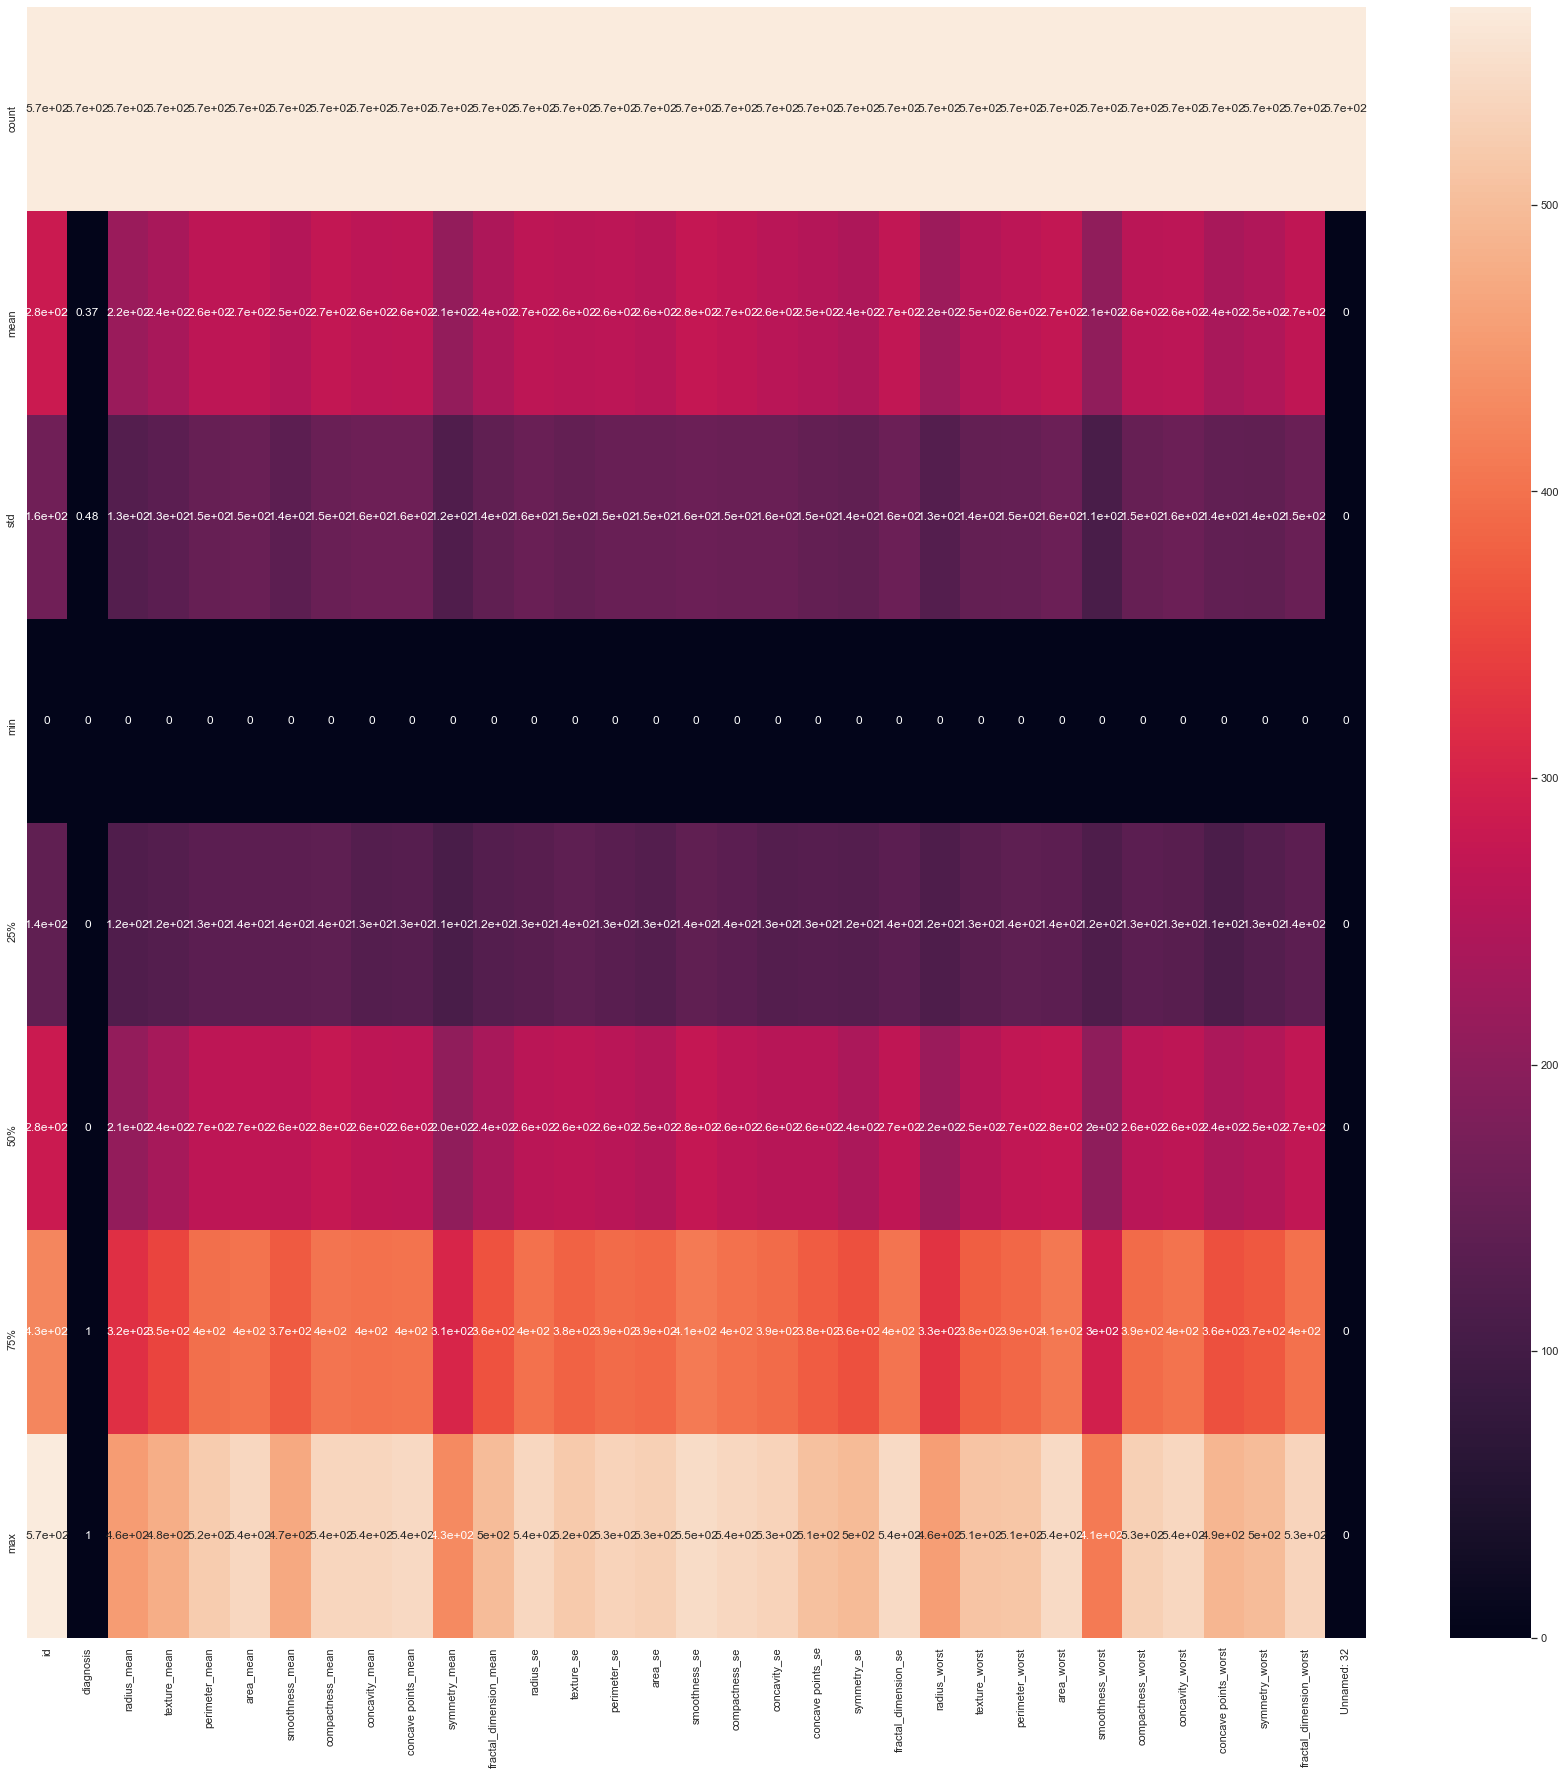

In [423]:
from matplotlib import pyplot as plt # importing function from sklearn, mapping from sns, also giving custom size
plt.figure(figsize=(30,30))
sns.heatmap(df.describe(),annot=True)

In [424]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

<AxesSubplot:xlabel='concavity_worst', ylabel='count'>

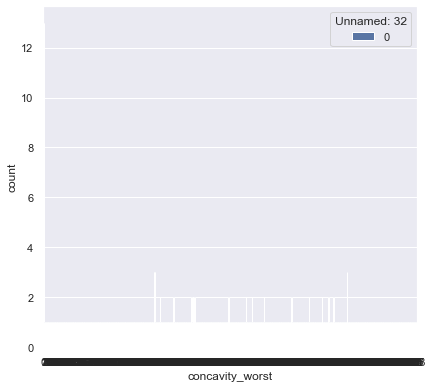

In [427]:
sns.set(rc={'figure.figsize':(6.7,6.27)})

sns.countplot(x='concavity_worst',hue='Unnamed: 32',data=df) # counting plot by seaborn x vs y

<AxesSubplot:xlabel='symmetry_worst', ylabel='count'>

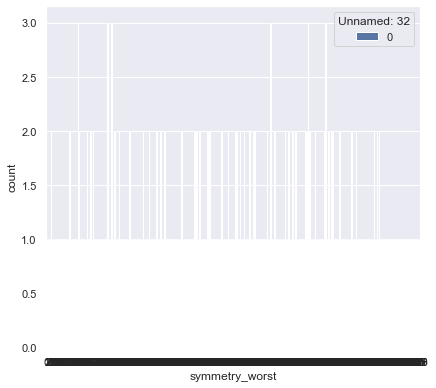

In [428]:
sns.set(rc={'figure.figsize':(6.7,6.27)})
sns.countplot(x='symmetry_worst',hue='Unnamed: 32',data=df)  # counting plot by seaborn x vs y

<AxesSubplot:xlabel='concave points_se', ylabel='count'>

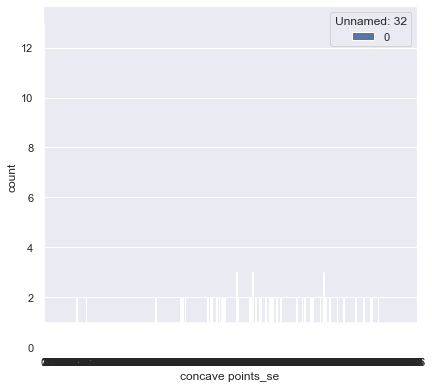

In [356]:
sns.set(rc={'figure.figsize':(6.7,6.27)})
sns.countplot(x='concave points_se',hue='Unnamed: 32',data=df)

In [430]:
df.shape # total shape of data

(569, 33)

<AxesSubplot:>

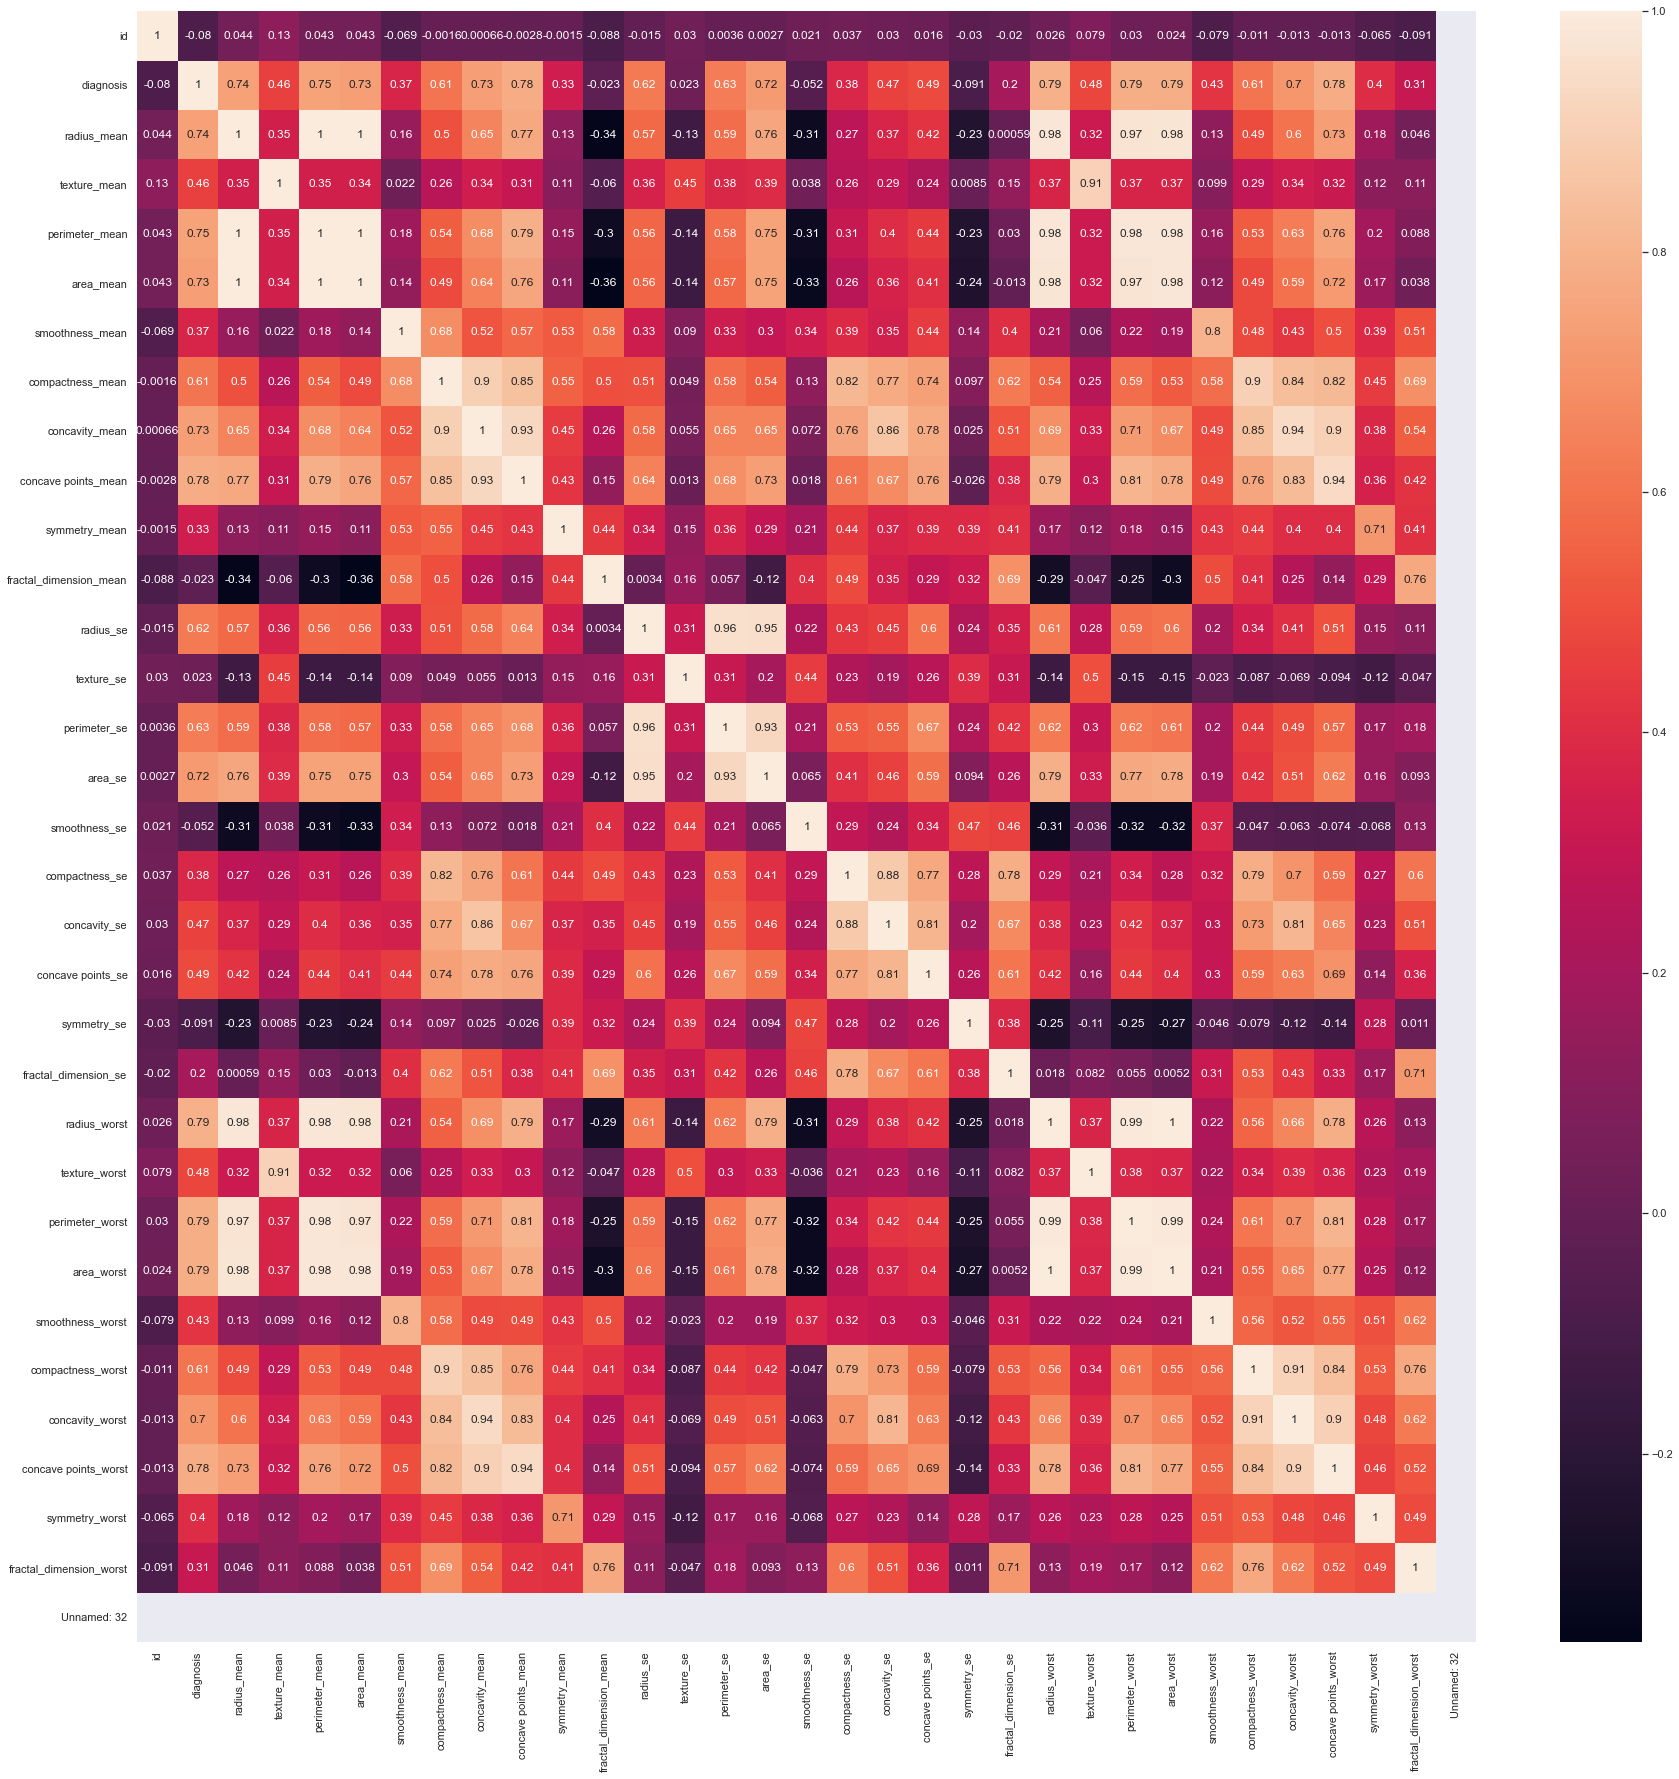

In [432]:
from matplotlib import pyplot as plt # please follow above comments for same activity
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [433]:
x=df.drop('Unnamed: 32',axis=1) # geeting x by droping unnamed 32

In [434]:
x

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,41,1,370,1,455,452,444,531,521,526,...,425,41,497,516,358,516,520,483,485,506
1,42,1,426,186,486,513,120,215,321,396,...,419,199,465,511,158,210,278,401,222,375
2,488,1,406,324,478,487,403,459,478,516,...,399,261,455,491,287,464,438,468,445,361
3,489,1,98,297,164,95,471,533,507,493,...,215,298,281,194,408,524,511,479,499,533
4,490,1,418,60,493,506,332,414,480,492,...,381,28,453,470,239,245,415,363,81,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,381,1,438,370,503,522,410,364,509,522,...,426,293,480,518,263,255,423,453,21,133
565,382,1,413,463,483,499,295,312,415,483,...,401,494,459,493,116,218,350,364,152,63
566,383,1,340,458,410,421,115,308,329,335,...,328,460,390,413,106,371,366,317,40,244
567,384,1,429,467,500,501,442,530,530,531,...,431,500,497,502,367,525,534,482,472,514


In [435]:
y=df['Unnamed: 32'] # value of y

In [436]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: Unnamed: 32, Length: 569, dtype: int64

In [438]:
from sklearn.model_selection import train_test_split # importing train_test_split function

In [439]:
# train data  = 70%
# test data   = 30%
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.30,random_state=52) # train_size = .70

In [440]:
xtrain.shape

(398, 32)

In [441]:
df.shape

(569, 33)

In [442]:
xtest.shape

(171, 32)

In [443]:
xtrain

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
394,266,0,140,185,173,166,352,293,222,260,...,147,270,191,186,280,190,190,104,326,128
387,261,0,245,124,290,311,12,53,75,31,...,242,102,290,309,3,101,125,50,142,62
353,450,1,300,437,369,382,347,294,393,380,...,323,447,375,406,370,292,419,342,182,419
37,64,0,194,216,224,246,184,17,104,225,...,136,178,142,168,30,3,48,63,16,24
447,471,0,286,182,350,360,213,264,188,152,...,275,175,320,349,152,214,246,184,443,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,184,0,29,116,26,30,117,28,56,87,...,28,75,22,29,318,58,73,139,224,298
503,334,1,444,276,510,528,230,390,449,487,...,451,208,508,536,134,415,398,460,281,156
86,502,1,270,333,333,341,248,297,390,323,...,263,368,330,337,200,229,359,290,319,92
151,559,0,5,307,5,5,240,404,400,144,...,5,376,5,5,360,468,474,155,411,532


In [444]:
from sklearn.tree import DecisionTreeClassifier # importin decisiontreeclassifier from sklearn

In [445]:
clf=DecisionTreeClassifier()

In [446]:
clf.fit(xtrain,ytrain) # trainig data

DecisionTreeClassifier()

In [447]:
pred=clf.predict(xtest) #predicted y for testing value

In [448]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [449]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [450]:
print(classification_report(ytest,pred)) #ytest = actual value, pred= predicted value


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [451]:
cm=confusion_matrix(ytest,pred)
cm

array([[171]], dtype=int64)

In [452]:
(171+0)/(171+0+0+0) #accuracy

1.0

In [453]:
clf.score(xtest,ytest) # xtest = value of x, ytest value  of y 

1.0

In [454]:
accuracy_score(ytest,pred)

1.0

In [456]:
tp,fn,fp,tn=171,0,0,0 # tough i have got one valu tp as 172 so lest of them will be 0
#  tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1) ValueError: not enough values to unpack (expected 4, got 1)

In [457]:
accuracy=(tp+tn)/(tp+fn+fp+tn) # model accuracy score

In [458]:
print(accuracy)

1.0


In [459]:
ppv=tp/(tp+fp)  #preceossion or Positive predictive value
print(ppv)

1.0


In [460]:
tpr=tp/tp+fn #sensitivity,recall,hit rate or true positive rate
print(tpr)

1.0


In [461]:
fpr=fp/fp+tn # issa korle exception handle kora jeto try use kore
print(fpr)

ZeroDivisionError: division by zero

In [462]:
f1_measure=(ppv+tpr)/2 # f1 measure= (precision+recall)/2
print(f1_measure)

1.0


In [463]:
f1=(2*ppv*tpr)/(ppv+tpr) # Harmonic mean,f1 score
print(f1)

1.0


In [464]:
# true negative rate, or specificityor selectiviy
tnr=tn/tn+fp  # issa korle exception handle kora jeto try use kore
print(tnr)

ZeroDivisionError: division by zero

In [465]:
fdr=fp/(tp+fp) #false discovery rate
print(fdr)

0.0


In [466]:
#threat score(ts)  or critical success index(csi)
csi=tp/(tp+fn+fp)
print(csi)

1.0


# ROC and AUC

In [467]:
plot_roc_curve(clf, xtest, ytest)

ValueError: DecisionTreeClassifier should be a binary classifier

In [468]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

ValueError: DecisionTreeClassifier should be a binary classifier